# Decision Trees 

Decision Trees are versatile ML algorithms that can perform both classification (predicting classes) and regression (predicting values) tasks. They are very powerful algorithms, capable of fitting complex datasets. DTs are the building blocks of Random Forests. Scikit-Learn uses the *Classification and Regression Tree (CART)* algorithm to train (grow) trees. 

### Load Libraries

In [1]:
# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Decision Trees

In [6]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#### Load Iris Dataset

In [7]:
# Import Iris Dataset
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [8]:
## Create a DecisionTreeClassifier with max_depth=2, random_state=42 
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)

# Fit the data
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [9]:
## Generate DT diagram: For your own interest
#  (1) Using export_graphviz to output a graph definition file (iris_tree.dot)

from sklearn.tree import export_graphviz
export_graphviz(
       tree_clf,
       out_file = "iris_tree.dot",
       feature_names = iris.feature_names[2:],
       class_names = iris.target_names,
       rounded = True,
       filled = True
   )

# (2) Convert that .dot file to PDF or PNG using the graphviz package
# and this command: $ dot -Tpng iris_tree.dot -o iris_tree.png

### Model Interpretation
**White Box vs. Black Box:** Because DTs are intuitive and their decisions are easy to interpret they are often called *white box models*. Random Forests and Neural Networks are considered *black box models*, because they make great predictions and the calculations used to make those predictions are easy to check, but it's hard to explain *why* the predictions were made. For example, DT's classification rules can be visualized, but we don't know how a NN determined a person was in a picture, i.e., we don't know which features (eyes, nose, mouth?) were used to determine there is a person in the picture. 

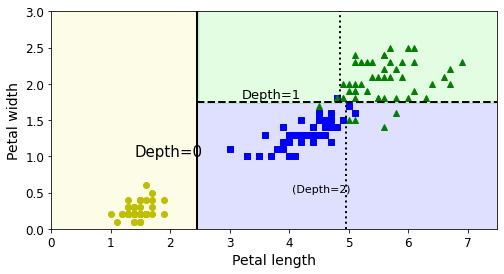

In [10]:
# Visualize the decision boundaries of tree_clf 
# How to interpret the figure:
# The thick vertical line represents the decision boundary of the root node 
#     (depth 0): petal length = 2.45 cm. Because the left (light yellow) area 
#     is 'pure' (only Iris Setosa data is there), we cannot split it any further.
# The right area of the figure (green and blue areas) is 'impure', so 
#     depth-1 right node splits it at petal width = 1.75 cm (dashed line). 
# Because max_depth = 2, the DT stops there.
# If you set max_depth = 3, then the depth-2 nodes would each add another
#     decision boundary (dotted lines). 


from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

### Estimate Class Probabilities
DTs can be used to estimate the probability that an instance belongs to a particular class *k*. The algorithm searches the tree to find the leaf node for that instance, and then returns the ratio of training instances of class *k* in the node. 

Example: Instance is a flower with petals 5 cm long and 1.5 cm wide. The corresponding leaf node is the depth-2 left node, so the DT should output these probabilities: Setosa (0%), Versicolor (49/54 = 90.7%), and Virginica (5/54 = 9.3%). And the class prediction should be Versicolor (because it has the highest probability). 

In [11]:
# Predict the class probability for the example flower
# petals are 5 cm long and 1.5 cm wide
tree_clf.predict_proba(np.array([[5, 1.5]]))

array([[0.        , 0.90740741, 0.09259259]])

In [13]:
# Predict the class for that example flower
tree_clf.predict(np.array([[5, 1.5]]))

array([1])

# Regression Trees

In [14]:
from sklearn.tree import DecisionTreeRegressor

### Generate Dataset

In [15]:
# Create noisy quadratic dataset 
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [16]:
# Create a DecisionTreeRegressor with max depth of 2 & random state of 42
# This tree will look similar to the previous tree, but now instead of 
# predicting a class at each node, it will predict a value
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)

# Fit the data
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

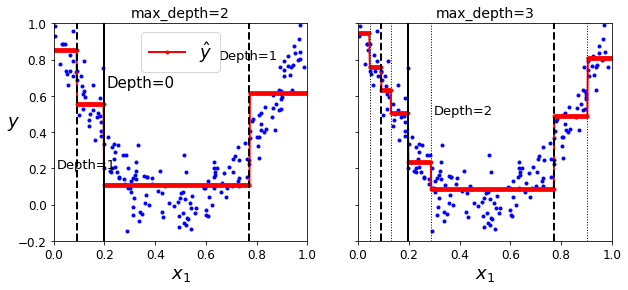

In [17]:
# Visualize the tree_reg predictions

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()


The CART algorithm used for classification (previous section) works the same for regression predictions, except instead of trying to split the training set to minimize 'impurity', it now tries to split the training set in a way that will minimize MSE (the CART cost function shown in class). 

In [18]:
# Create a regression tree with random_state = 42 
tree_reg1 = DecisionTreeRegressor(random_state=42)

# Fit the data
tree_reg1.fit(X, y)

DecisionTreeRegressor(random_state=42)

In [19]:
# Create a regression tree with random_state = 42 and min_samples_leaf = 10 
tree_reg2 = DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

# Fit the data
tree_reg2.fit(X, y)

DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

In [20]:
x1 = np.linspace(0, 1, 500).reshape(-1, 1)

# Use tree_reg1 to predict x1
y_pred1 = tree_reg1.predict(x1)

# Use tree_reg2 to predict x1
y_pred2 = tree_reg2.predict(x1)

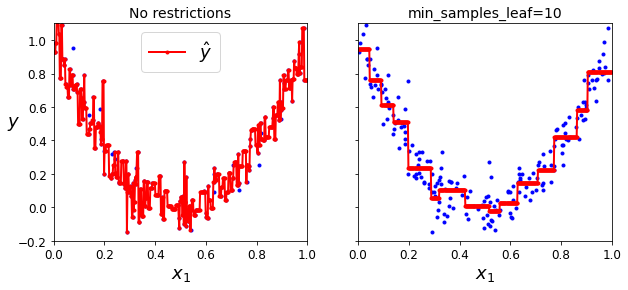

In [21]:
# Visualize DT overfitting
# The left figure has no regularization (uses default hyperparameters)
#     and is severly overfitting the training set.
# The right figure is a more reasonable model. 

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

# Random Forests
If you aggregate the predictions of a group of predictors (classifiers or regressors), you will usually get better predictions than with the best individual predictor. A group of predictors is called an **ensemble**, so this technique is called Ensemble Learning, and an Ensemble Learning Algorithm is called an Ensemble Method. 

Random Forest is an ensemble of Decision Trees. Scikit-Learn provides a **RandomForestClassifier** for classification tasks and **RandomForestRegressor** for regression tasks. 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
# Create a RandomForestClassifier with 500 trees, each limited
#     to maximum 16 nodes (and use: n_jobs = -1)
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs = -1)

# Fit the training data (previous cell)
rnd_clf.fit(X_train, y_train)

# Use rnd_clf to predict for X_test
y_pred_rf = rnd_clf.predict_proba(X_test)



## Feature Importance
When you visualize the DT, important features are likely to appear closer to the root of the tree, while unimportant features will usually appear closer to the leaves (or not at all). You can use this to estimate the feature's importance by computing the average depth that the feature appears across all trees in the forest. Scikit-Learn computes this automatically for every feature after training and you can access it with the *feature_importances_* variable. 

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()


In [25]:
# Create a RandomForestClassifier with 500 trees and n_jobs = -1
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs = -1)


In [26]:
# Fit the iris data and iris target
rnd_clf.fit(iris.data, iris.target)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [27]:
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.10309761228768258
sepal width (cm) 0.0261007361046454
petal length (cm) 0.4336527400683616
petal width (cm) 0.4371489115393104
